Here's the model we use to fit the device response. We assume that the quasiparticle density is given by
$$
n_{qp}(\Gamma)
  =
  n_* \left[
  \left( 1 + \frac{2 \tau_{\mathrm{max}}}{n_* V} \Gamma \right)^{1/2} -1 \right],
$$
where $\Gamma = \Gamma_t + \Gamma_a + \Gamma_o$ and these are respectively the generation rates due to thermal phonons, readout photons, and absorbed optical photons. Assume that $\Gamma_t$ and $\Gamma_o$ are independent of $\Gamma_o \propto P$, where $P$ is the absorbed optical power.

For each detector, at a given readout power we simultaneously fit the data to the following equations:
$$
\frac{f_r(P = 0)}{f_r(P)} - 1
  \equiv
  X(P)
  =
  X_0 \left[ \left( 1 + \frac{P + P_0}{P_*} \right)^{1/2} - 1 \right]
$$
and
$$
Q_i^{-1}(P)
  =
  I_0 \left[ \left( 1 + \frac{P + P_0}{P_*} \right)^{1/2} - 1 \right] + Q_C^{-1},
$$
where $X_0$, $I_0$, and $Q_C^{-1}$ are constants.

In [1]:
from notebooks.library.display import toggle_input_code
toggle_input_code()

In [11]:
from scipy.constants import h, k as k_B
from kid_readout.analysis import archive, dataframe, plot_dataframe
plt.rcParams['font.size'] = 11

In [3]:
thermal = archive.load_archive('/data/readout/archive/2015-05-1213_mmw_noise_broadband.npy')
coherent140 = archive.load_archive('/data/readout/archive/2015-05-1819_mmw_140_GHz.npy')
coherent148 = archive.load_archive('/data/readout/archive/2015-05-1920_mmw_148_GHz.npy')
coherent156 = archive.load_archive('/data/readout/archive/2015-05-2021_mmw_156_GHz.npy')

In [4]:
# Use 148 GHz data
coherent = coherent148

In [30]:
channel = 8
atten = 29

In [31]:
t = thermal[(thermal.channel==channel) &
            (thermal.atten==atten) &
            (thermal.timestream_modulation_duty_cycle==0) &
            ~thermal.zbd_power_NEP2_device.isnull()]
t = t.sort('zbd_power', ascending=False)

In [32]:
c = coherent[(coherent.channel==channel) &
             (coherent.atten==atten) &
             (coherent.timestream_modulation_duty_cycle==0) &
             ~thermal.zbd_power_NEP2_device.isnull()]
c = c.sort('zbd_power', ascending=False)

Reduced chi-square: 53.2


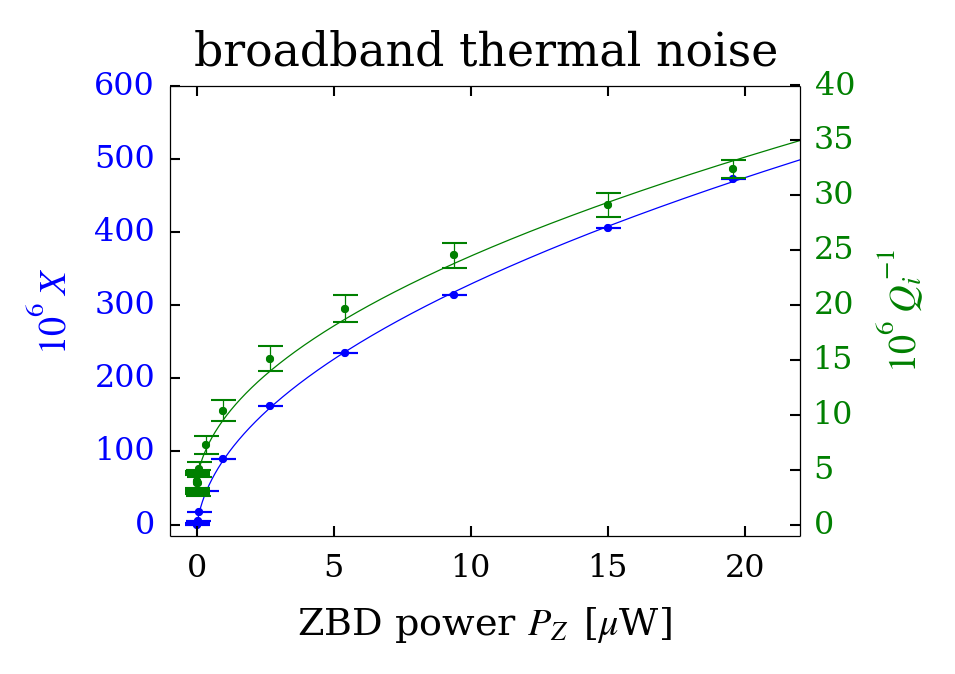

In [33]:
fig, axes = plot_dataframe.plot_responsivity(t, nrows=1, ncols=1, figsize=(3, 2))
axes[0].set_ylim(-15, 600)
axes[0].set_xlabel('ZBD power $P_Z$ [$\mu$W]')
axes[0].set_title('broadband thermal noise')
print("Reduced chi-square: {:.1f}".format(t.zbd_power_XI_fit_redchi.iloc[0]))

Reduced chi-square: 1922.1


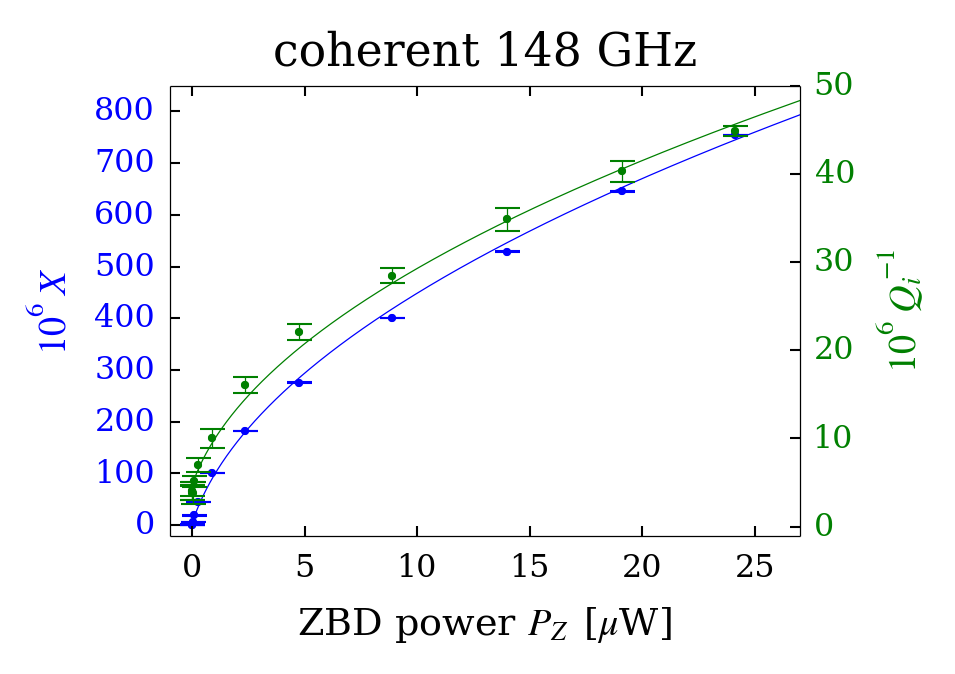

In [34]:
fig, axes = plot_dataframe.plot_responsivity(c, nrows=1, ncols=1, figsize=(3, 2))
axes[0].set_ylim(-20, 850)
axes[0].set_title('coherent 148 GHz')
axes[0].set_xlabel('ZBD power $P_Z$ [$\mu$W]')
print("Reduced chi-square: {:.1f}".format(c.zbd_power_XI_fit_redchi.iloc[0]))

The two figures above show the detector response to applied millimeter-wave power. The horizontal axis is approximately the power emitted by the source, and is about $10^6$ times the power absorbed by each detector. The fractional frequency shift $X$ and inverse internal quality factor $Q_i^{-1}$ are extracted at each millimeter-wave power level from fits to a frequency sweep. The solid lines are a five-parameter fit to all of the data shown.

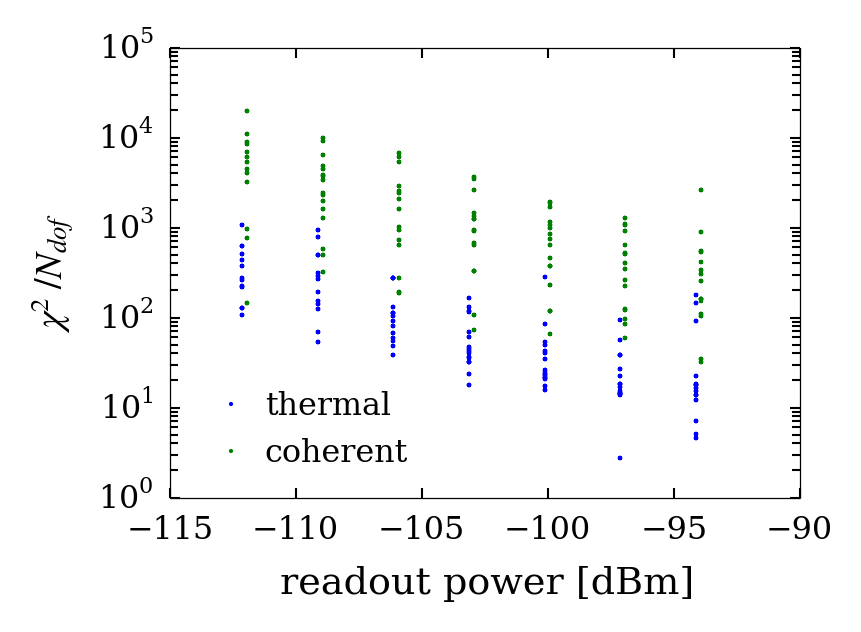

In [35]:
offset=0.1
plt.semilogy(thermal.power_dbm - offset, thermal.zbd_power_XI_fit_redchi, '.b', ms=1, label='thermal')
plt.semilogy(coherent.power_dbm + offset, coherent.zbd_power_XI_fit_redchi, '.g', ms=1, label='coherent')
plt.xlabel('readout power [dBm]')
plt.ylabel('$\chi^2 / N_{dof}$')
plt.legend(loc='best', fontsize='x-small')
plt.ylim(1e0, 1e5);

The model fits the thermal noise data much better than the coherent data, presumably because in the single-frequency case the quasiparticle occupancy differs significantly from a thermal distribution.